## BME i9400
## Fall 2024
### Homework 4: Stratified K-Fold Cross Validation and L2 Regularized Logistic Regression


**Due date: Wednesday, November 13th 2024, 11:59:59.987 PM EST**

In this homework, you will implement a logistic regression model with L2 regularization, and evaluate it using stratified K-Fold cross-validation.

Stratification refers to the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.

In the cells below, I have indicated places where code needs to be added with instructions contained in double hashtags (for example ## DO SOMETHING ##). 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

### Set the random seed

In [2]:
## DO NOT MODIFY THIS CELL
np.random.seed(42)

### Load the data

In [3]:
## DO NOT MODIFY THIS CELL
df = pd.read_csv('parkinsons.csv')
labels = df["status"].values
features = df.drop(columns=["status", "name"]).values
features.shape, labels.shape

((195, 22), (195,))

### Create an instance of the StratifiedKFold class with 5 folds

In [4]:
## DO NOT MODIFY THIS CELL
skf = StratifiedKFold(n_splits=5)

### Task 1 
**Evaluate a logistic regression model on this dataset using 5-fold stratified cross-validation.**
- You should use the model object created in the above cell -> *No model was available, so I defined my own*
- Do not regularize the classifier!
- Use a value for ```max_iter``` of 10000 and disregard any convergence warnings
- For each of the five folds, compute the area under the ROC curve and the average precision, storing each of them in a list
- Report the average area under the ROC curve and the average average precision across the five folds

In [5]:
model = LogisticRegression(max_iter = 10000)

In [6]:
rocs = []
prcs = []

## Add code for cross-validation here
for idx_train, idx_val in skf.split(features,labels):
    X_train, X_val = features[idx_train], features[idx_val]
    y_train, y_val = labels[idx_train], labels[idx_val]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rocs.append(roc_auc_score(y_val, y_pred))
    prcs.append(average_precision_score(y_val, y_pred))

## Report AUROC and average precision here
print("AUROC: ", np.mean(rocs))
print("Average Precision: ", np.mean(prcs))

AUROC:  0.7126436781609196
Average Precision:  0.8508170603343018


### Task 2
**Repeat Task 1, but this time adding L2 to the logistic regression model.**
- You must evaluate the following values for the hyperparameter ```C```
    - C: 0.01, 0.1, 1, 10, 100, 1000, 10000
- For each hyperparameter value, compute the average area under the ROC curve and the average average precision across the five folds, and store them in a list or numpy array
- Use a sufficiently large value for the ```max_iter``` parameter of the LogisticRegression class to avoid convergence warnings.
- Report the highest value of the average area under the ROC curve and the average average precision. -> *highest???*
- Also report the hyperparameters that yield the best average area under the ROC curve and the average average precision.
- Create a plot with L2 hyperparameter on the x-axis, and average ROC and average precision on the y-axis (overlaid) -- use a logarithmic scale for the x-axis.


In [7]:
cc = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
rocs = np.zeros(shape = (len(cc), 5))
prcs = np.zeros(shape = (len(cc), 5))

## Add code for cross-validation here
for i, c in enumerate(cc):
    model = LogisticRegression(C=c, max_iter=10000)
    for j, (idx_train, idx_val) in enumerate(skf.split(features, labels)):
        X_train, X_val = features[idx_train], features[idx_val]
        y_train, y_val = labels[idx_train], labels[idx_val]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rocs[i, j] = roc_auc_score(y_val, y_pred)
        prcs[i, j] = average_precision_score(y_val, y_pred)

In [8]:
## Compute the average auroc and average average precision for each value of cc
rocs_foldavg = np.mean(rocs, axis=1)
prcs_foldavg = np.mean(prcs, axis=1)
    
## Report the highest values of the average auroc and average average precision here
highest_roc, cc_best_roc = np.max(rocs_foldavg), cc[np.argmax(rocs_foldavg)]
highest_prec, cc_best_prec = np.max(prcs_foldavg), cc[np.argmax(prcs_foldavg)]
print("Highest AUROC: ", highest_roc, " with C: ", cc_best_roc)
print("Highest Average Precision: ", highest_prec, " with C: ", cc_best_prec)

Highest AUROC:  0.7193103448275862  with C:  10
Highest Average Precision:  0.8531922290252598  with C:  10


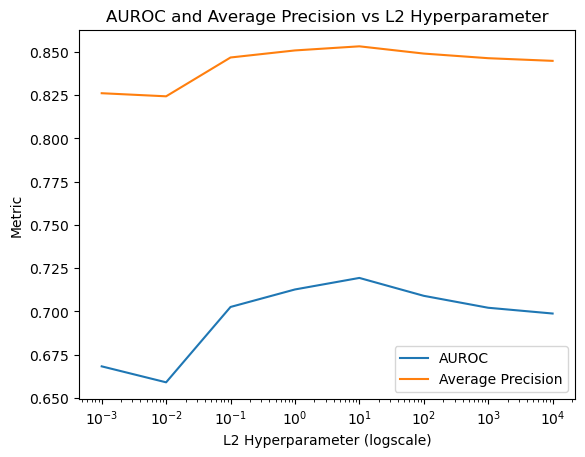

In [9]:
## Create the plot here
plt.plot(cc, np.mean(rocs, axis=1), label='AUROC')
plt.plot(cc, np.mean(prcs, axis=1), label='Average Precision')
plt.xlabel('L2 Hyperparameter (logscale)')
plt.ylabel('Metric')
plt.title('AUROC and Average Precision vs L2 Hyperparameter')
plt.xscale('log')
plt.legend()
plt.show()